<a href="https://colab.research.google.com/github/WoojinJeonkr/Data-Analysis/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%8A%B9%EC%A7%95_%EC%B6%94%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **엣지 추출**

In [1]:
from skimage.data import text
import cv2
import matplotlib.pyplot as plt

In [2]:
img = text()

In [3]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

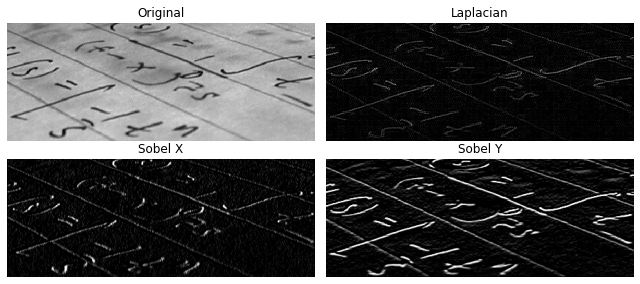

In [4]:
plt.figure(figsize=(9, 4))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")
plt.tight_layout()
plt.show()

# **케니 엣지 추출**

In [5]:
img = text()

In [6]:
edges = cv2.Canny(img, 50, 100)

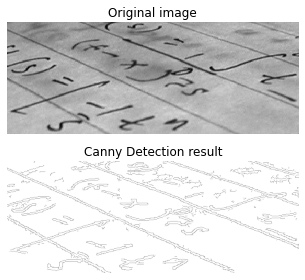

In [7]:
plt.subplot(2, 1, 1)
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(edges, cmap="Greys", alpha=0.3)
plt.axis('off')
plt.title("Canny Detection result")
plt.tight_layout()
plt.show()

# **해리스 코너 추출**

In [8]:
import numpy as np

In [9]:
dst = cv2.cornerHarris(img, 2, 3, 0.24)

In [10]:
# thresholding
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)

In [11]:
x, y = np.nonzero(dst)

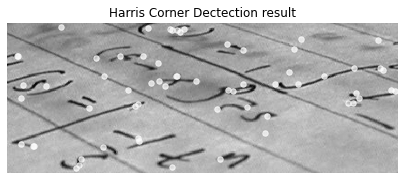

In [12]:
plt.figure(figsize=(7,7))
plt.title("Harris Corner Dectection result")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.scatter(y, x, s=30, c="w", alpha=0.7)
plt.show()

# **Shi & Tomasi 코너 추출**

In [13]:
corners = cv2.goodFeaturesToTrack(img, 100, 0.001, 40)
corners = np.int0(corners)

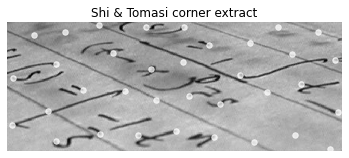

In [14]:
plt.title("Shi & Tomasi corner extract")
plt.imshow(img, cmap="gray")
plt.scatter(corners[:, 0, 0], corners[:, 0, 1], s=30, c="w", alpha=0.7)
plt.axis("off")
plt.show()

# **허프라인 변환**
Canny Detection 방법으로 엣지를 추출 --> 추출한 엣지로부터 HoughLineP 함수를 사용해 직선을 추출

In [15]:
from skimage.data import checkerboard

In [16]:
img = checkerboard()
rows, cols = img.shape

In [17]:
pts1 = np.float32([[25, 25], [175, 25], [25, 175], [175, 175]])
pts2 = np.float32([[25, 50], [150, 25], [75, 175], [175, 125]])

In [18]:
H = cv2.getPerspectiveTransform(pts1, pts2)

In [19]:
img = cv2.warpPerspective(img, H, (cols, rows))

In [20]:
edges = cv2.Canny(img, 100, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, 50, 8)

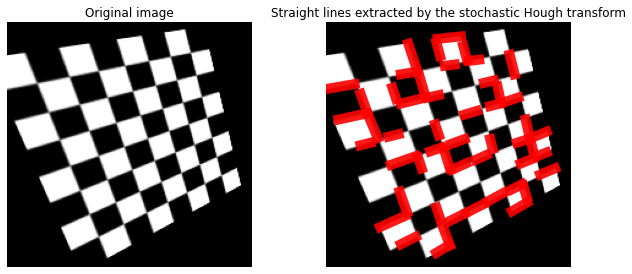

In [21]:
plt.figure(figsize=(9, 7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")
plt.axis("off")
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        plt.plot([x1, x2], [y1, y2], c='r', lw=10, alpha=0.9)
plt.title("Straight lines extracted by the stochastic Hough transform")

plt.tight_layout()
plt.show()

# **이미지 히스토그램**

In [22]:
from skimage.data import camera

In [23]:
img = camera()

In [24]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

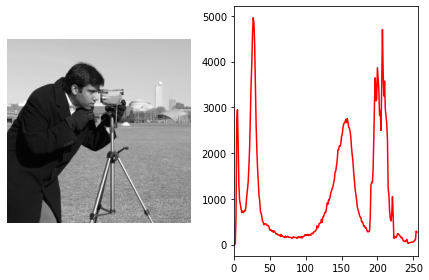

In [25]:
plt.subplot(121)
plt.imshow(img, "gray")
plt.axis("off")
plt.subplot(122)
plt.plot(hist, color='r')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

# **SIFT(Scale-Invariant Feature Transform)**
이미지에 대해 SIFT 특징을 찾고, 변환된 이미지에서 같은 특징점끼리 매칭하는 작업 수행

In [26]:
img = camera()

In [27]:
rows, cols = img.shape

In [28]:
H = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.7)

In [29]:
img_rotated = cv2.warpAffine(img, H, (cols, rows))

In [30]:
# pip install opencv-python==3.4.2.17

In [31]:
# pip uninstall opencv-contrib-python

In [32]:
# pip install opencv-contrib-python

In [33]:
sift = cv2.xfeatures2d.SIFT_create()

In [34]:
kps, des = sift.detectAndCompute(img, None)

In [35]:
kps_r, des_r = sift.detectAndCompute(img_rotated, None)

In [36]:
kp0 = kps[0]

In [37]:
print("pt=({},{}), size={}, angle={}".format(kp0.pt[0], kp0.pt[1], kp0.size, kp0.angle))

pt=(3.8693153858184814,185.40830993652344), size=2.6433968544006348, angle=271.9088134765625


In [38]:
bf = cv2.BFMatcher_create()
matches = bf.knnMatch(des, des_r, k=2)

In [39]:
good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

In [40]:
np.random.shuffle(good)
image_match = cv2.drawMatchesKnn(
    img, kps, img_rotated, kps_r, good[:10], flags=2, outImg=img)

In [41]:
pts_x = [kp.pt[0] for kp in kps]
pts_y = [kp.pt[1] for kp in kps]
pts_s = [kp.size for kp in kps]

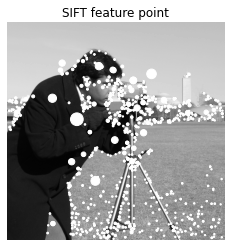

In [42]:
plt.imshow(img, cmap="gray")
plt.title("SIFT feature point")
plt.axis("off")
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()

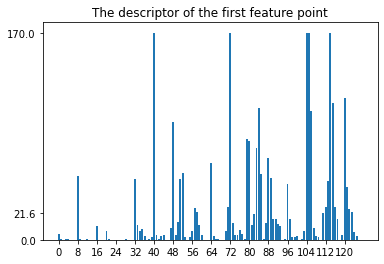

In [43]:
plt.bar(np.arange(len(des[0])), des[0])
plt.xticks(range(0, len(des[0]), 8))
plt.yticks([des[0].min(), des[0].mean(), des[0].max()])
plt.title("The descriptor of the first feature point")
plt.show()

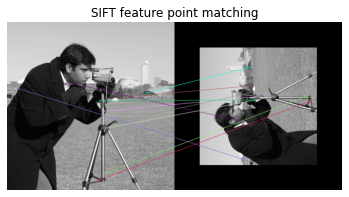

In [44]:
plt.imshow(image_match)
plt.title("SIFT feature point matching")
plt.axis("off")
plt.show()

# **FAST(Features from Accelerated Segment Test)**

In [45]:
fast = cv2.FastFeatureDetector_create()

In [46]:
kps = fast.detect(img, None)

In [47]:
img2 = cv2.drawKeypoints(img, kps, img, color=(255, 255, 255))

reference value:  10
nonmaxSuppression:  True
nonmaxSuppression after post-processing, the extracted all feature points:  6155


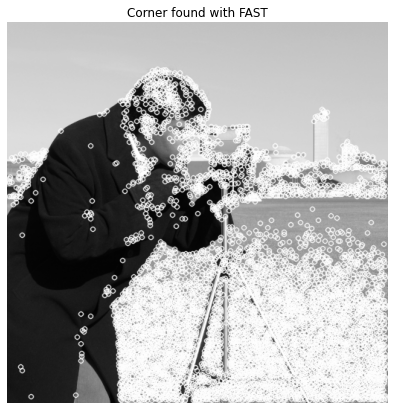

In [48]:
print("reference value: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("nonmaxSuppression after post-processing, the extracted all feature points: ", len(kps))
plt.figure(figsize=(7,7))
plt.imshow(img2, cmap='gray')
plt.title("Corner found with FAST")
plt.axis("off")
plt.show()

# **ORB(Oriented FAST and Rotated BRIEF)**

In [49]:
orb = cv2.ORB_create()

In [50]:
kps, des = orb.detectAndCompute(img, None)

In [51]:
kps_r, des_r = orb.detectAndCompute(img_rotated, None)

In [52]:
bf = cv2.BFMatcher_create()

In [53]:
matches = bf.knnMatch(des, des_r, k=2)

In [54]:
good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

In [55]:
np.random.shuffle(good)
image_match = cv2.drawMatchesKnn(
    img, kps, img_rotated, kps_r, good[:10], flags=2, outImg=img)

In [56]:
pts_x = [kp.pt[0] for kp in kps]
pts_y = [kp.pt[1] for kp in kps]
pts_s = [kp.size / 10 for kp in kps]

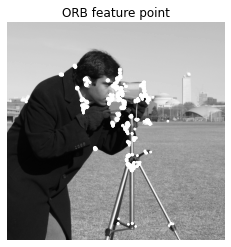

In [57]:
plt.imshow(img, cmap='gray')
plt.title("ORB feature point")
plt.axis("off")
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()

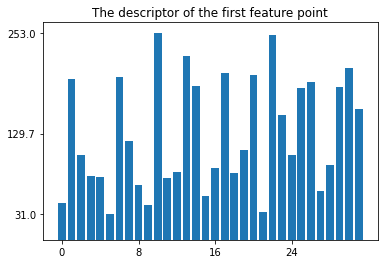

In [58]:
plt.bar(np.arange(len(des[0])), des[0])
plt.xticks(range(0, len(des[0]), 8))
plt.yticks([des[0].min(), des[0].mean(), des[0].max()])
plt.title("The descriptor of the first feature point")
plt.show()

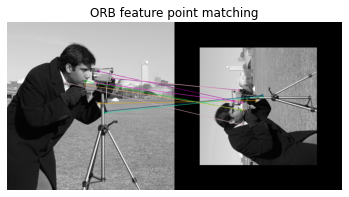

In [59]:
plt.imshow(image_match)
plt.title("ORB feature point matching")
plt.axis("off")
plt.show()